In [4]:
import pandas as pd
df=pd.read_csv("amazon_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie Name       8127 non-null   object 
 1   Language         8127 non-null   object 
 2   IMDb Rating      6120 non-null   object 
 3   Running Time     8127 non-null   object 
 4   Year of Release  7730 non-null   float64
 5   Maturity Rating  8127 non-null   object 
 6   Plot             8122 non-null   object 
dtypes: float64(1), object(6)
memory usage: 444.6+ KB


In [6]:
df.head()

,Movie Name,Language,IMDb Rating,Running Time,Year of Release,Maturity Rating,Plot
0,John Rambo,Tamil,7,1 h 26 min,2008.0,18+,"In Thailand, John Rambo joins a group of merce..."
1,American Pie,English,7,1 h 35 min,1999.0,18+,You'll never look at warm apple pie the same w...
2,Bombshell,English,6.8,1 h 48 min,2019.0,18+,"The provocative real story of three smart, amb..."
3,Love Birds,Tamil,5.1,2 h 40 min,1996.0,All,"After accidentally meeting, Mridula (Nagma) an..."
4,Hippi,Telugu,5,2 h 20 min,2019.0,18+,Hippi is about the live-in relationship betwee...


In [7]:
df.tail()

,Movie Name,Language,IMDb Rating,Running Time,Year of Release,Maturity Rating,Plot
8122,Blackout,English,5.2,1 h 31 min,2014.0,18+,This ensemble thriller tells the story of four...
8123,Loafer,Hindi,6.5,2 h 3 min,1973.0,All,Loafer Is A Bollywood Romantic Drama Hindi Mov...
8124,Remember Me,English,7.1,1 h 52 min,2010.0,13+,Two people scarred by grief find happiness in ...
8125,Khopa,Marathi,NaN,1 h 51 mins,2017.0,13+,Narya who comes from a loving and respected fa...
8126,Khandani Shafakhana,Hindi,4,2 h 14 min,2019.0,13+,A feisty girl from Punjab tries to continue he...


In [11]:
df.shape

(8127, 7)

In [8]:
df.duplicated().sum()

np.int64(3)

In [13]:
df=df.drop_duplicates()

In [14]:
df.shape

(8124, 7)

In [16]:
df.isnull().sum()

Movie Name            0
Language              0
IMDb Rating        2007
Running Time          0
Year of Release     397
Maturity Rating       0
Plot                  5
dtype: int64

In [17]:
import re
df["IMDb Rating"] = pd.to_numeric(df["IMDb Rating"], errors="coerce")
def convert_running_time(time_str):
    if isinstance(time_str, str):
        hours = re.search(r"(\d+)\s*h", time_str)
        minutes = re.search(r"(\d+)\s*min", time_str)
        
        total_minutes = 0
        if hours:
            total_minutes += int(hours.group(1)) * 60
        if minutes:
            total_minutes += int(minutes.group(1))
        
        return total_minutes if total_minutes > 0 else None
    return None
df["Running Time"] = df["Running Time"].apply(convert_running_time)
df["Year of Release"] = pd.to_numeric(df["Year of Release"], errors="coerce")
df["Plot"].fillna("No description available", inplace=True)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 8124 entries, 0 to 8126
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie Name       8124 non-null   object 
 1   Language         8124 non-null   object 
 2   IMDb Rating      6116 non-null   float64
 3   Running Time     8123 non-null   float64
 4   Year of Release  7727 non-null   float64
 5   Maturity Rating  8124 non-null   object 
 6   Plot             8124 non-null   object 
dtypes: float64(3), object(4)
memory usage: 507.8+ KB
None
     Movie Name Language  IMDb Rating  Running Time  Year of Release  \
0    John Rambo    Tamil          7.0          86.0           2008.0   
1  American Pie  English          7.0          95.0           1999.0   
2     Bombshell  English          6.8         108.0           2019.0   
3    Love Birds    Tamil          5.1         160.0           1996.0   
4         Hippi   Telugu          5.0         140.0           2019

C:\Users\rohit\AppData\Local\Temp\ipykernel_8896\684794363.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Plot"].fillna("No description available", inplace=True)


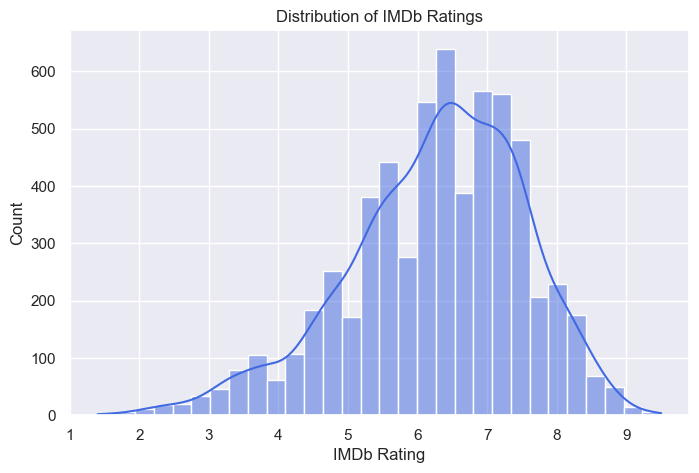

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

plt.figure(figsize=(8, 5))
sns.histplot(df["IMDb Rating"].dropna(), bins=30, kde=True, color="royalblue")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.title("Distribution of IMDb Ratings")
plt.show()

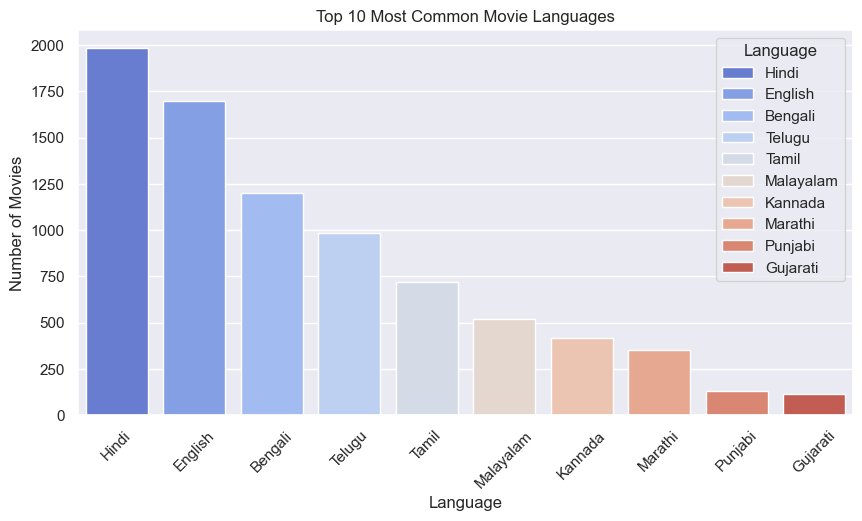

In [21]:
plt.figure(figsize=(10, 5))
top_languages = df["Language"].value_counts().head(10)
sns.barplot(x=top_languages.index, y=top_languages.values, palette="coolwarm", hue=top_languages.index, legend=True)
plt.xlabel("Language")
plt.ylabel("Number of Movies")
plt.title("Top 10 Most Common Movie Languages")
plt.xticks(rotation=45)
plt.show()

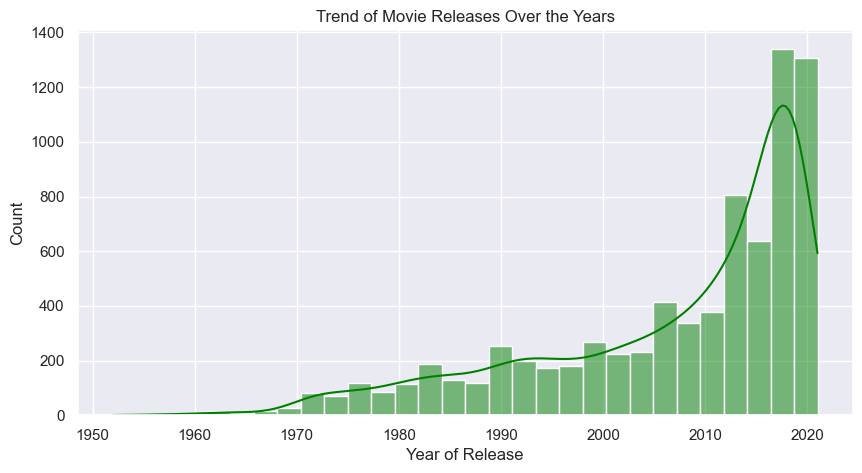

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Year of Release"].dropna(), bins=30, kde=True, color="green")
plt.xlabel("Year of Release")
plt.ylabel("Count")
plt.title("Trend of Movie Releases Over the Years")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
df_filtered = df.dropna(subset=["IMDb Rating", "Running Time", "Year of Release"])

X = df_filtered[["IMDb Rating", "Running Time", "Year of Release"]]
y = df_filtered["IMDb Rating"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (4666, 3), Testing Set: (1167, 3)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df["Plot"].fillna("", inplace=True)

vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(df["Plot"])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
def recommend_movies(movie_name, top_n=5):
    idx = df[df["Movie Name"].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in dataset." 
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    return df["Movie Name"].iloc[movie_indices]


print("Recommended movies for 'Marco':")
print(recommend_movies("Marco"))

Recommended movies for 'Marco':
Movie not found in dataset.
